# Hands On Session: Dimensionality Reduction, SVD & PCA
# By: Sabera Talukder

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SaberaTalukder/Chen_Institute_DataSAI_for_Neuroscience/blob/main/07_05_22_day1_overview/code/diy_notebooks/dimensionality_reduction.ipynb)

In [109]:
# All Imports - alphabetically ordered with shortcuts
import matplotlib.pyplot as plt
import numpy as np
import time

from mpl_toolkits import mplot3d
from numpy.linalg import svd
from scipy.io import loadmat
from sklearn.decomposition import PCA

# Data Exploration

## Hint: do not reinvent the wheel! If you want to do something, a preexisiting package, library, function, etc. exists to do what you want. Google & Stack Overflow are your friends 😃

## Load Data
#### Dataset background: this is calcium imaging data from one male mouse. We have already converted the calcium imaging videos into continuous neural signals, so you don't have to worry about it (you're welcome 😘). The male mouse has different visitors in his cage throughout the recording, and we'll explore dimensionality reduction by determining if it's 🐭❤️ or 🐭 😡!

In [2]:
data_path = '/home/sabra/Documents/Chen_Institute_DataSAI_for_Neuroscience/07_05_22_day1_overview/data/hypothalamus_calcium_imaging_remedios_et_al.mat'
hypothalamus_data = loadmat(data_path);

## How many data arrays are contained in hypothalamus_data?
#### Hint: what happens if you type the variable name in a cell and run the cell?

In [3]:
# Enter code here:

In [4]:
# Solution:
# There are 3 data arrays contained in hypothalamus_data: 'attack_vector', 'neural_data', 'sex_vector'

## Extract the N data arrays into N separate variables.

In [5]:
# Enter code here:

In [6]:
# Soultion:
neural_data = hypothalamus_data['neural_data']
attack_vector = hypothalamus_data['attack_vector']
sex_vector = hypothalamus_data['sex_vector']

## What is the dimensionality of each of the N data arrays?
## What do you think the dimensions represent?

In [7]:
# Enter code here:

In [8]:
# Soultion:
print(neural_data.shape)
print(attack_vector.shape)
print(sex_vector.shape)

# neural_data --> (115, 18561) which is number_of_neurons x time
# attack_vector --> (1, 18561) which is whether_or_not_attacking x time
# sex_vector --> (1, 18561) which is intruder_sex x time

(115, 18561)
(1, 18561)
(1, 18561)


## What is the distribution of the values inside the arrays?
#### Hint: the answer to this question can be a picture!
#### Hint Hint: sometimes functions run faster if you transform a matrix a vector first.

In [9]:
# Enter code here:

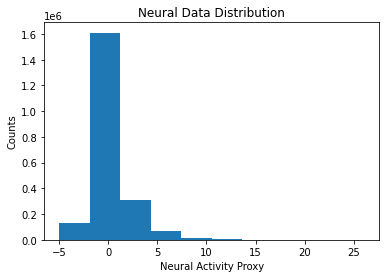

In [10]:
# Solution:
_ = plt.hist(np.ndarray.flatten(neural_data))
_ = plt.title('Neural Data Distribution')
_ = plt.xlabel('Neural Activity Proxy')
_ = plt.ylabel('Counts')

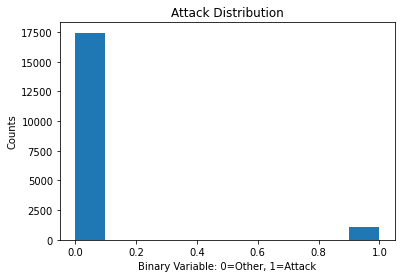

In [11]:
# Solution:
_ = plt.hist(np.ndarray.flatten(attack_vector))
_ = plt.title('Attack Distribution')
_ = plt.xlabel('Binary Variable: 0=Other, 1=Attack')
_ = plt.ylabel('Counts')

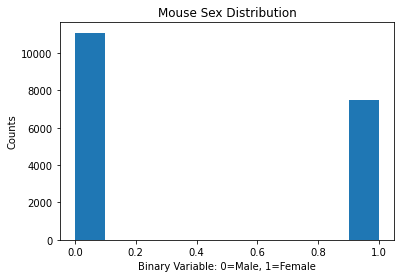

In [12]:
# Solution:
_ = plt.hist(np.ndarray.flatten(sex_vector))
_ = plt.title('Mouse Sex Distribution')
_ = plt.xlabel('Binary Variable: 0=Male, 1=Female')
_ = plt.ylabel('Counts')

## Plot the N data arrays.
#### Hint: sometimes the most expeditious way to visualize data is to treat it as an image!
#### Hint Hint: one visualization might give you something you dont expect, but is the problem the data?

In [13]:
# Enter code here:

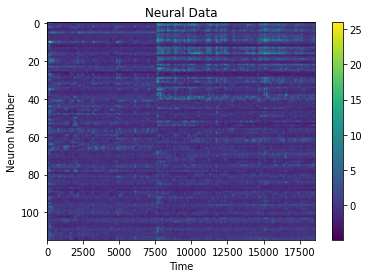

In [14]:
# Soultion:
_ = plt.imshow(neural_data, aspect='auto', cmap='viridis')
_ = plt.colorbar()
_ = plt.title('Neural Data')
_ = plt.xlabel('Time')
_ = plt.ylabel('Neuron Number')

The top figure looks green even though the data is binary, just because of the visulization not the data. Prove it to yourself by either figuring out what parameter you need to add or zooming into a piece!


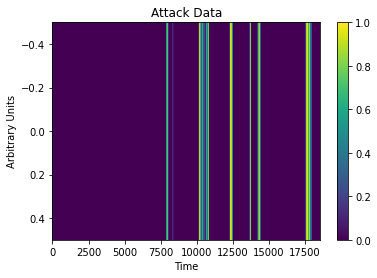

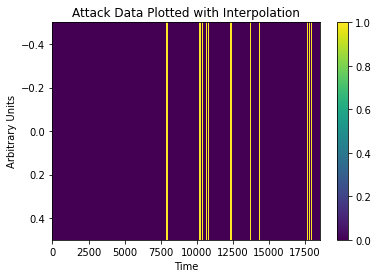

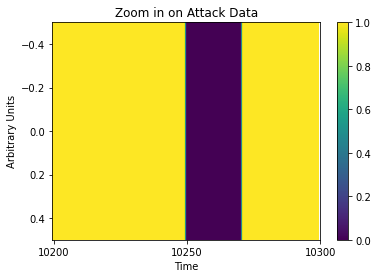

In [15]:
print('The top figure looks green even though the data is binary, \
just because of the visulization not the data. Prove it to yourself by either figuring \
out what parameter you need to add or zooming into a piece!')

_ = plt.imshow(attack_vector, aspect='auto', cmap='viridis')
_ = plt.colorbar()
_ = plt.title('Attack Data')
_ = plt.xlabel('Time')
_ = plt.ylabel('Arbitrary Units')

_ = plt.figure()
_ = plt.imshow(attack_vector, aspect='auto', cmap='viridis', interpolation='nearest')
_ = plt.colorbar()
_ = plt.title('Attack Data Plotted with Interpolation')
_ = plt.xlabel('Time')
_ = plt.ylabel('Arbitrary Units')

_ = plt.figure()
_ = plt.imshow(attack_vector[:, 10200:10300], aspect='auto', cmap='viridis')
_ = plt.colorbar()
_ = plt.title('Zoom in on Attack Data')
_ = plt.xlabel('Time')
_ = plt.ylabel('Arbitrary Units')
_ = plt.xticks([0, 50, 100], [10200, 10250, 10300])

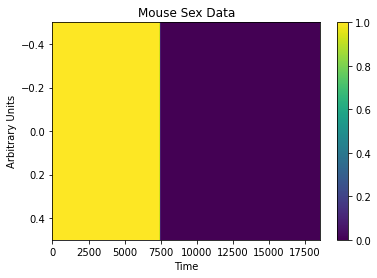

In [16]:
_ = plt.imshow(sex_vector, aspect='auto')
_ = plt.colorbar()
_ = plt.title('Mouse Sex Data')
_ = plt.xlabel('Time')
_ = plt.ylabel('Arbitrary Units')

## What do the values inside the arrays represent?

In [17]:
# Enter answer here (code can be used, but not required):

In [18]:
# Solution:
# neural_data --> the values in the arrays are a proxy for neuron firing.
# Large numbers mean high activity, small numbers mean low activity.

# attack_vector --> the binary values indicate the class, either: attack(1) or other(0).

# sex_vector --> the binary values indicate the class of the visitor, either: female(1) or male(0).

### Great job exploring the data! Now let's dive into what we can do with it!

# Dimensionality Reduction

## Prinicpal Components Analysis (PCA)
#### We're going to dive into how PCA works, but first we're going to see what can be done with it! All you need to know for now is that PCA creates a lower dimensional representation of your data to preserve the data's variance.

#### By now you know you have a neural data array that is number_of_neurons by time, let's say the dimensionality is NxT. What we are going to do with PCA is take all of our time steps and compress them; this will output an array that is SxT where S < N. In other words each time step is initially an N dimensional vector, that gets compressed into an S dimensional vector where S < N. Let's explore this with S = 3.

In [19]:
# make a PCA model with with S = 3
pca_model_s_3 = PCA(n_components=3)

# STOP & Check Yourself: Do you know why we can just call "PCA"?

# with the PCA model instance we created to our neural data
neural_pca_s_3 = pca_model_s_3.fit_transform(neural_data.T)

## What is the dimensionality of the PCAed neural data? What do these dimensions mean?

In [20]:
# Enter code here:

In [21]:
# Solution:
print(neural_pca_s_3.shape)

# First index is time, second index is top 3 principal components (aka PCs). Note this is flipped from above!!

(18561, 3)


## Plot the Principal Components (aka PCs) in 3D!

In [22]:
# %matplotlib inline
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# # Enter code here:
# pc1 = pass
# pc2 = pass
# pc3 = pass

# ax.scatter3D(pc1, pc2, pc3);

<IPython.core.display.Javascript object>


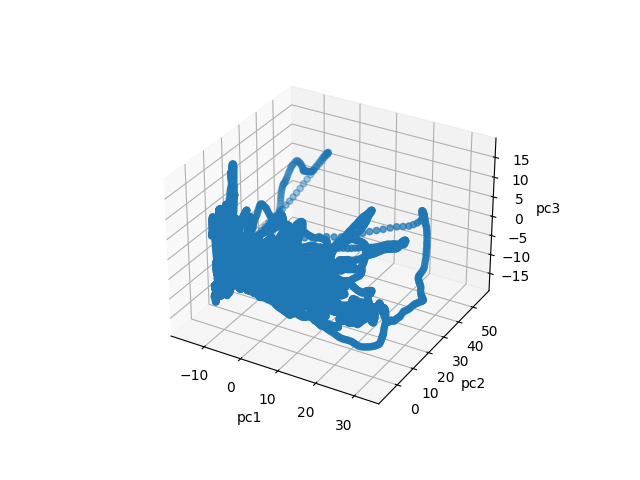

In [23]:
# Solution
# do this to switch into movable 3d plotting
%matplotlib notebook 
fig = plt.figure()
ax = plt.axes(projection='3d')

# Enter code here:
pc1 = neural_pca_s_3[:, 0]
pc2 = neural_pca_s_3[:, 1]
pc3 = neural_pca_s_3[:, 2]

ax.scatter3D(pc1, pc2, pc3)

_ = ax.set_xlabel('pc1')
_ = ax.set_ylabel('pc2')
_ = ax.set_zlabel('pc3')

## Nice job! Now rotate your representation! What interesting things do you notice about your dimensionality reduced data?
#### Hint: why does this data look connected?
#### Hint Hint: Why are the axes so different from each other? What do they represent?

In [24]:
# Solution (some of many):
# The data looks connected because we took each time step and embedded it. So, adjacent dots (ie 
# individual time steps) are near their neighbors in time. We will verify this later on./

# The axes are very different from each other because we don't enforce ranges on PCA, and haven't normalized or
# standardized the data afterwards. We don't definitively know what each PC represents and that's part of the 
# difficulty. Interpretability is a hard problem

In [25]:
# do this to switch out of movable 3d plotting (i.e. when you have 2d plots next)
%matplotlib inline 

## We're going to return to this visualization, but first you have to be thinking to yourself, we got rid of A LOT of dimensions how do we know this representation is still good? Great question! You tell me 👇🏻👇🏼👇🏽👇🏾👇🏿

## How much variance is explained by each of these top 3 prinicpal components? What does this tell you about the data?
#### Hint: what is the first hint I gave you?

In [26]:
# Enter code here:

The top three PCs each explain this amount of variance: [0.35768848 0.13396795 0.07023927]
All together they explain:  0.5618956974599374 amount of the variance in the original data.


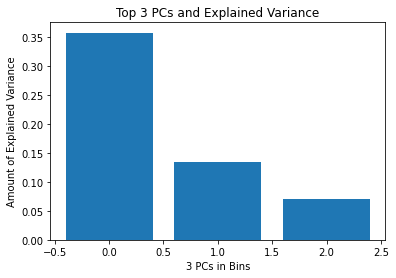

In [27]:
# Solution:
print('The top three PCs each explain this amount of variance:', pca_model_s_3.explained_variance_ratio_)
print('All together they explain: ', np.sum(pca_model_s_3.explained_variance_ratio_), 'amount \
of the variance in the original data.')

_ = plt.title('Top 3 PCs and Explained Variance')
_ = plt.ylabel('Amount of Explained Variance')
_ = plt.xlabel('3 PCs in Bins')
_ = plt.bar([0,1,2], pca_model_s_3.explained_variance_ratio_)

# This tells me that the first PC does a decent job of caputuring variance in the data.

## Now that you know how much variance is explained by each of the top 3 PCs, let's explore the representation we built further!

#### Let's start by coloring each time point as a function of when it appears in the time series.
#### Hint: you're not changing the plot you're changing the color!

In [28]:
# Enter code here:

<IPython.core.display.Javascript object>


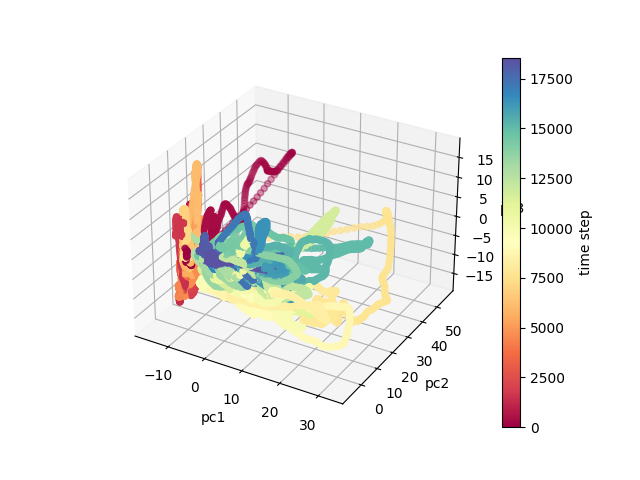

In [29]:
# Solution

# make a vector to change the color
time_varying_color = np.arange(0, pc3.shape[0], 1)


# do this to switch into movable 3d plotting
%matplotlib notebook 
fig = plt.figure()
ax = plt.axes(projection='3d')

# Enter code here:
pc1 = neural_pca_s_3[:, 0]
pc2 = neural_pca_s_3[:, 1]
pc3 = neural_pca_s_3[:, 2]

our_plot = ax.scatter3D(pc1, pc2, pc3, c=time_varying_color, cmap='Spectral')

_ = ax.set_xlabel('pc1')
_ = ax.set_ylabel('pc2')
_ = ax.set_zlabel('pc3')

cbar = fig.colorbar(our_plot, ax=ax)
cbar.set_label('time step')

## What does this tell you about the representation?

## Now make three separate plots colored by the attack variable! 😡🐭❓

### For plot 1: Plot only the attack data points
### For plot 2: Plot only the other data points
### For plot 3: Plot the the attack data points on top of the other data points

#### Hint: it may be easier to separate your data by labels first!
#### Hint Hint: for plot 3 play with opacity (goes by a different name though!), and zorder.

In [30]:
# Enter Code Here:

In [31]:
# Solutions

In [32]:
pc1_attack = [] 
pc2_attack = []
pc3_attack = []

pc1_other = []
pc2_other = []
pc3_other = []

for idx, attack_label in enumerate(attack_vector[0]):
    if attack_label == 1:
        pc1_attack.append(pc1[idx])
        pc2_attack.append(pc2[idx])
        pc3_attack.append(pc3[idx])
        
    elif attack_label == 0:
        pc1_other.append(pc1[idx])
        pc2_other.append(pc2[idx])
        pc3_other.append(pc3[idx])
        
print(len(pc1_attack), len(pc2_attack), len(pc3_attack))
print(len(pc1_other), len(pc2_other), len(pc3_other))

1107 1107 1107
17454 17454 17454


<IPython.core.display.Javascript object>


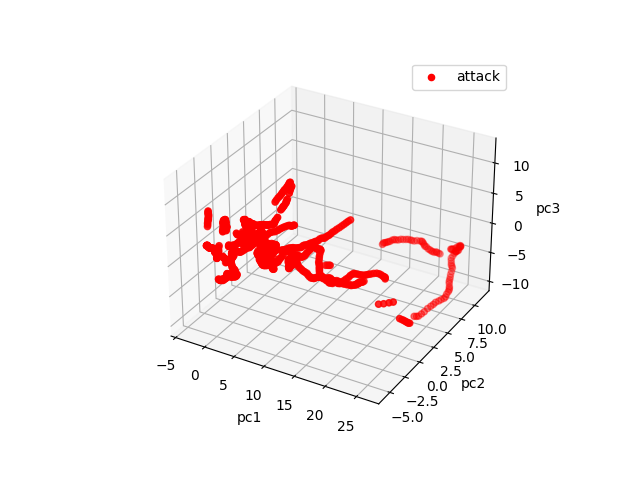

In [33]:
# do this to switch into movable 3d plotting
%matplotlib notebook 
fig = plt.figure()
ax = plt.axes(projection='3d')

our_plot = ax.scatter3D(pc1_attack, pc2_attack, pc3_attack, color='red')

_ = ax.set_xlabel('pc1')
_ = ax.set_ylabel('pc2')
_ = ax.set_zlabel('pc3')

_ = ax.legend(['attack'])

<IPython.core.display.Javascript object>


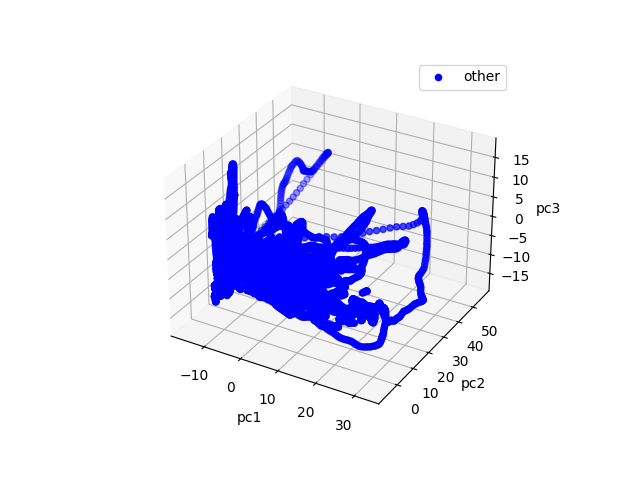

In [34]:
# do this to switch into movable 3d plotting
%matplotlib notebook 
fig = plt.figure()
ax = plt.axes(projection='3d')

our_plot = ax.scatter3D(pc1_other, pc2_other, pc3_other, color='blue')

_ = ax.set_xlabel('pc1')
_ = ax.set_ylabel('pc2')
_ = ax.set_zlabel('pc3')

_ = ax.legend(['other'])

<IPython.core.display.Javascript object>


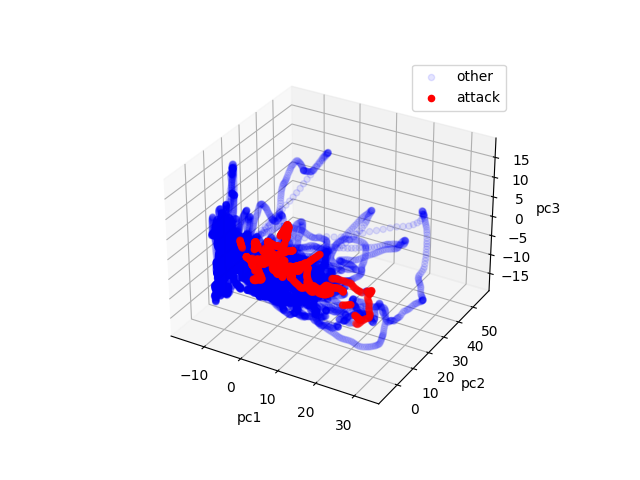

In [35]:
# do this to switch into movable 3d plotting
%matplotlib notebook 
fig = plt.figure()
ax = plt.axes(projection='3d', computed_zorder=False)

ax.scatter3D(pc1_other, pc2_other, pc3_other, color='blue', alpha = 0.1, zorder=-10)

ax.scatter3D(pc1_attack, pc2_attack, pc3_attack, color='red')

_ = ax.set_xlabel('pc1')
_ = ax.set_ylabel('pc2')
_ = ax.set_zlabel('pc3')

_ = ax.legend(['other', 'attack'])

## Now build the same plot but color based on the mouse sex variable! ❤️🐭❓

In [36]:
pc1_female = [] 
pc2_female = []
pc3_female = []

pc1_male = []
pc2_male = []
pc3_male = []

for idx, sex_label in enumerate(sex_vector[0]):
    if sex_label == 1:
        pc1_female.append(pc1[idx])
        pc2_female.append(pc2[idx])
        pc3_female.append(pc3[idx])
        
    elif sex_label == 0:
        pc1_male.append(pc1[idx])
        pc2_male.append(pc2[idx])
        pc3_male.append(pc3[idx])
        
print(len(pc1_female), len(pc2_female), len(pc3_female))
print(len(pc1_male), len(pc2_male), len(pc3_male))

7476 7476 7476
11085 11085 11085


<IPython.core.display.Javascript object>


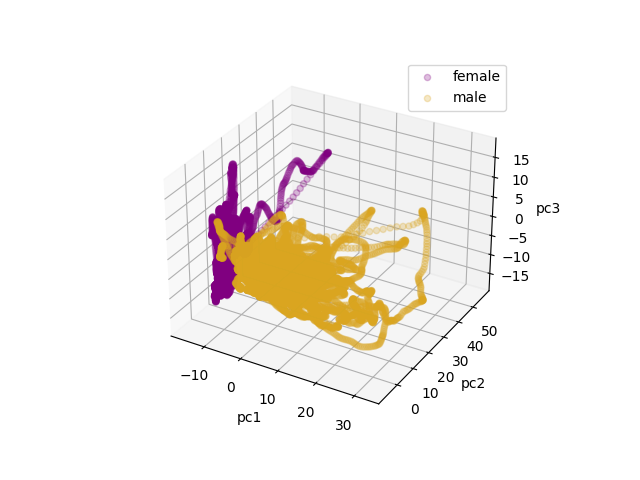

In [37]:
# do this to switch into movable 3d plotting
%matplotlib notebook 
fig = plt.figure()
ax = plt.axes(projection='3d', computed_zorder=False)

ax.scatter3D(pc1_female, pc2_female, pc3_female, color='purple', alpha=0.25)

ax.scatter3D(pc1_male, pc2_male, pc3_male, color='goldenrod', alpha=0.25)

_ = ax.set_xlabel('pc1')
_ = ax.set_ylabel('pc2')
_ = ax.set_zlabel('pc3')

_ = ax.legend(['female', 'male'])

## Great! Now that you know more about the data and PCA, I want you to repeat everything you just did if you reduce the data to 2 PCs! More explicitly:

#### ✦ Train a model on the neural data with 2 PCs.
#### ✦ How much explained variance do these 2 PCs capture? Do you notice anything interesting about these 2 PCs? 😉
#### ✦ How is time visualized in these 2 PCs?
#### ✦ How is 🐭 😡 visualized in these 2 PCs?
#### ✦ How is 🐭 ❤️ visualized in these 2 PCs?

### Finally, if you needed to build a model to classify time, attack, or the visitor's sex how many PCs would you use? Do you loose anything between 3 PCs and 2PCs?

In [38]:
# Enter Code Here:

In [39]:
# Solution:

In [40]:
# Change plotting for 2d
%matplotlib inline

# Train PCA
pca_model_s_2 = PCA(n_components=2)
neural_pca_s_2 = pca_model_s_2.fit_transform(neural_data.T)

pc1 = neural_pca_s_2[:, 0]
pc2 = neural_pca_s_2[:, 1]

The top two PCs each explain this amount of variance: [0.35768848 0.13396795]
All together they explain:  0.4916564322304048 amount of the variance in the original data.


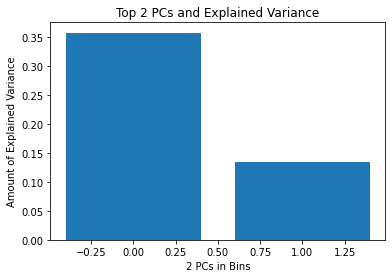

In [41]:
# How much variance is explained
print('The top two PCs each explain this amount of variance:', pca_model_s_2.explained_variance_ratio_)
print('All together they explain: ', np.sum(pca_model_s_2.explained_variance_ratio_), 'amount \
of the variance in the original data.')

_ = plt.title('Top 2 PCs and Explained Variance')
_ = plt.ylabel('Amount of Explained Variance')
_ = plt.xlabel('2 PCs in Bins')
_ = plt.bar([0,1], pca_model_s_2.explained_variance_ratio_)
_ = plt.show()

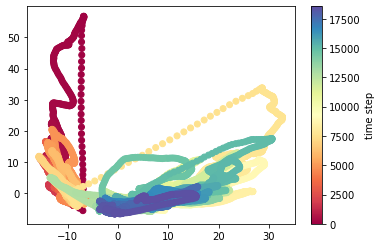

In [42]:
# Do the plotting for 2d
time_varying_color = np.arange(0, pc1.shape[0], 1)
_ = plt.scatter(pc1, pc2, c=time_varying_color, cmap='Spectral')
cbar = plt.colorbar()
cbar.set_label('time step')
_ = plt.show()

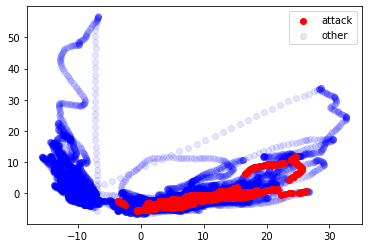

In [43]:
# Separate points based on attack and plot
pc1_attack = []
pc2_attack = []
pc1_other = []
pc2_other = []

for idx, attack_label in enumerate(attack_vector[0]):
    if attack_label == 1:
        pc1_attack.append(pc1[idx])
        pc2_attack.append(pc2[idx])
        
    elif attack_label == 0:
        pc1_other.append(pc1[idx])
        pc2_other.append(pc2[idx])

_ = plt.scatter(pc1_attack, pc2_attack, color='red')
_ = plt.scatter(pc1_other, pc2_other, color='blue', alpha = 0.1, zorder=-10)
_ = plt.legend(['attack', 'other'])
_ = plt.show()

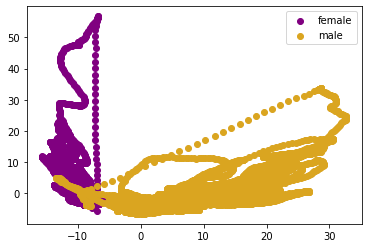

In [44]:
# Separate points based on sex and plot
pc1_female = []
pc2_female = []
pc1_male = []
pc2_male = []

for idx, sex_label in enumerate(sex_vector[0]):
    if sex_label == 1:
        pc1_female.append(pc1[idx])
        pc2_female.append(pc2[idx])
        
    elif sex_label == 0:
        pc1_male.append(pc1[idx])
        pc2_male.append(pc2[idx])

_ = plt.scatter(pc1_female, pc2_female, color='purple')
_ = plt.scatter(pc1_male, pc2_male, color='goldenrod')
_ = plt.legend(['female', 'male'])
_ = plt.show()

# Implement PCA yourself!!

#### What is the dimensionality of the neural data agin?

In [45]:
# Enter code here:

Neural data shape: (115, 18561)
Shape of your mean centered data: (115, 18561)


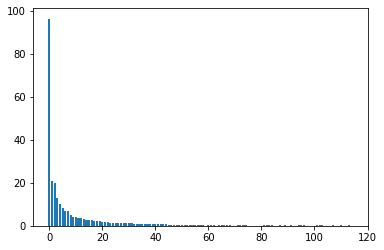

First PC explained variance:  0.3673525692891904
Second PC explained variance:  0.07880855794745287
Third PC explained variance:  0.07571405597326579


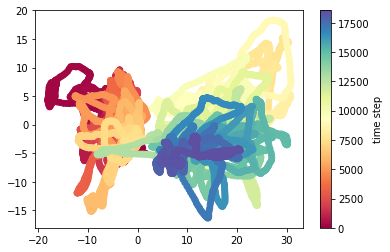

<IPython.core.display.Javascript object>


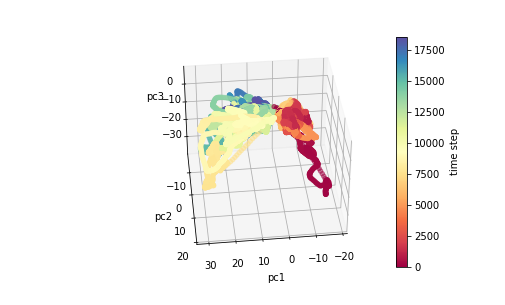

In [103]:
# Option 1 Solution:
print('Neural data shape:', neural_data.shape)

# Take the mean of your data
mean_neural_data = np.mean(neural_data, axis=0)

# mean center all your data
mean_centered_neural_data = neural_data - mean_neural_data
print('Shape of your mean centered data:', mean_centered_neural_data.shape)

# calculate the covariance matrix
cov_matrix = np.cov(mean_centered_neural_data, y=None, rowvar=True, bias=False)

# compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# plot the eigenvalues, print how much each pc is responsible for
%matplotlib inline
_ = plt.bar(np.arange(eigenvalues.shape[0]), eigenvalues)
_ = plt.show()

print('First PC explained variance: ', eigenvalues[0]/np.sum(eigenvalues))
print('Second PC explained variance: ', eigenvalues[1]/np.sum(eigenvalues))
print('Third PC explained variance: ', eigenvalues[2]/np.sum(eigenvalues))

# tranform data using 2 PCs and plot
pca_data_2 = np.dot(mean_centered_neural_data.T, eigenvectors[:, 0:2])

%matplotlib inline
time_varying_color = np.arange(0, mean_centered_neural_data.shape[1], 1)
_ = plt.scatter(pca_data_2[:, 0], pca_data_2[:, 1], c=time_varying_color, cmap='Spectral')
cbar = plt.colorbar()
cbar.set_label('time step')
_ = plt.show()

# tranform data using 3 PCs and plot
pca_data_3 = np.dot(mean_centered_neural_data.T, eigenvectors[:, 0:3])

%matplotlib notebook 
fig = plt.figure()
ax = plt.axes(projection='3d')

# Enter code here:
pc1 = pca_data_3[:, 0]
pc2 = pca_data_3[:, 1]
pc3 = pca_data_3[:, 2]

our_plot = ax.scatter3D(pc1, pc2, pc3, c=time_varying_color, cmap='Spectral')

_ = ax.set_xlabel('pc1')
_ = ax.set_ylabel('pc2')
_ = ax.set_zlabel('pc3')

cbar = fig.colorbar(our_plot, ax=ax)
cbar.set_label('time step')

Neural data shape: (115, 18561)
Shape of your mean centered data: (115, 18561)
U, S, Vt shapes respectively: (115, 115) (115,) (18561, 18561)


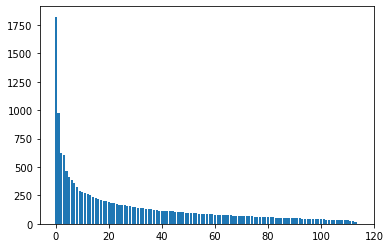

Explained variance in the first singular value: 0.11107146362918062
Explained variance in the second singular value: 0.05950061256791626
Explained variance in the third singular value: 0.03773770336243072


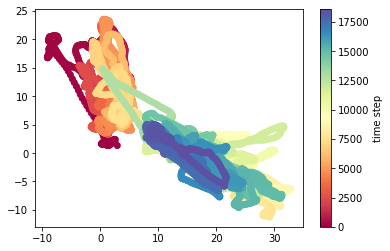

<IPython.core.display.Javascript object>


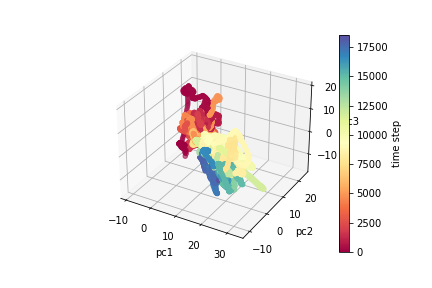

In [140]:
# Option 2 Solution:
print('Neural data shape:', neural_data.shape)

# Take the mean of your data
mean_neural_data = np.mean(neural_data, axis=0)

# mean center all your data
mean_centered_neural_data = neural_data - mean_neural_data
print('Shape of your mean centered data:', mean_centered_neural_data.shape)

# compute the matrix decomposition via Singular Value Decomposition (SVD)
U, S, Vt = svd(mean_centered_neural_data, full_matrices=True)
print('U, S, Vt shapes respectively:', U.shape, S.shape, Vt.shape)



# plot the singular values
%matplotlib inline 
_ = plt.bar(np.arange(S.shape[0]), S)
_ = plt.show()

print('Explained variance in the first singular value:', S[0]/np.sum(S))
print('Explained variance in the second singular value:',S[1]/np.sum(S))
print('Explained variance in the third singular value:',S[2]/np.sum(S))

# decomposition with 2 singular values, and 2 left singular vectors
pca_data_2_via_svd = np.dot(mean_centered_neural_data.T, U[:, 0:2])

# Do the plotting for 2d
time_varying_color = np.arange(0, mean_centered_neural_data.shape[1], 1)
_ = plt.scatter(pca_data_2_via_svd[:, 0], pca_data_2_via_svd[:, 1], c=time_varying_color, cmap='Spectral')
cbar = plt.colorbar()
cbar.set_label('time step')
_ = plt.show()



# decomposition with 3 singular values, and 3 left singular vectors
pca_data_3_via_svd = np.dot(mean_centered_neural_data.T, U[:, 0:3])

# plotting for 3d
%matplotlib notebook 
fig = plt.figure()
ax = plt.axes(projection='3d')

# Enter code here:
pc1 = pca_data_3_via_svd[:, 0]
pc2 = pca_data_3_via_svd[:, 1]
pc3 = pca_data_3_via_svd[:, 2]

our_plot = ax.scatter3D(pc1, pc2, pc3, c=time_varying_color, cmap='Spectral')

_ = ax.set_xlabel('pc1')
_ = ax.set_ylabel('pc2')
_ = ax.set_zlabel('pc3')

cbar = fig.colorbar(our_plot, ax=ax)
cbar.set_label('time step')

## Why don't all the 3 methods that we tried give you the same thing?!?
#### Did we mean center the data before? --> What happens if we do?

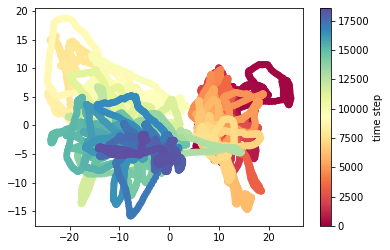

In [136]:
print(neural_data.shape)

# Take the mean of your data
mean_neural_data = np.mean(neural_data, axis=0)

# mean center all your data
mean_centered_neural_data = neural_data - mean_neural_data
print('Shape of your mean centered data:', mean_centered_neural_data.shape)

# make a PCA model with with S = 2
pca_model_s_2 = PCA(n_components=2)

# with the PCA model instance we created to our neural data
model_1_pca_package = pca_model_s_2.fit_transform(mean_centered_neural_data.T)

# plot the singular values
%matplotlib inline 

time_varying_color = np.arange(0, model_1_pca_package.shape[0], 1)
_ = plt.scatter(model_1_pca_package[:, 0], model_1_pca_package[:, 1], c=time_varying_color, cmap='Spectral')
cbar = plt.colorbar()
cbar.set_label('time step')
_ = plt.show()

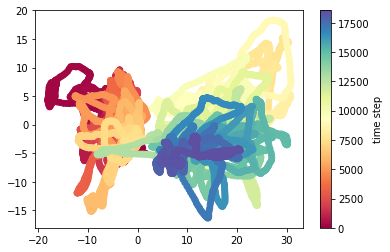

In [134]:
# Option 1
# calculate the covariance matrix
cov_matrix = np.cov(mean_centered_neural_data, y=None, rowvar=True, bias=False)

# compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# tranform data using 2 PCs and plot
model_2_pca_from_scratch = np.dot(mean_centered_neural_data.T, eigenvectors[:, 0:2])

time_varying_color = np.arange(0, model_2_pca_from_scratch.shape[0], 1)
_ = plt.scatter(model_2_pca_from_scratch[:, 0], model_2_pca_from_scratch[:, 1], c=time_varying_color, cmap='Spectral')
cbar = plt.colorbar()
cbar.set_label('time step')
_ = plt.show()

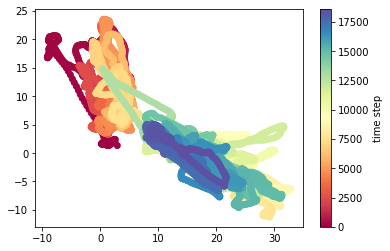

In [139]:
# compute the matrix decomposition via Singular Value Decomposition (SVD)
U, S, Vt = svd(mean_centered_neural_data, full_matrices=True)

# decomposition with 2 singular values, and 2 left singular vectors
model_3_pca_with_svd = np.dot(mean_centered_neural_data.T, U[:, 0:3])

# Do the plotting for 2d
time_varying_color = np.arange(0, model_3_pca_with_svd.shape[0], 1)
_ = plt.scatter(model_3_pca_with_svd[:, 0], model_3_pca_with_svd[:, 1], c=time_varying_color, cmap='Spectral')
cbar = plt.colorbar()
cbar.set_label('time step')
_ = plt.show()

# To dive deeper into the math behind PCA & SVD stay tuned for day 3!!